In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import Bloom_filters as BF
import Adaptive_Bloom_filters as ABF
import multiprocessing
from tqdm import tqdm
from sklearn.model_selection import cross_val_score
import math

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer 
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yinzhema/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/yinzhema/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Data Pre-Processing

In [3]:
web_classification_df=pd.read_csv('Webpages_Classification_train_data.csv')

In [4]:
web_classification_df.loc[web_classification_df['label']=='good',['label']]=0
web_classification_df.loc[web_classification_df['label']=='bad',['label']]=1

In [5]:
web_classification_df=pd.concat([web_classification_df[web_classification_df['label']==0][:50000],web_classification_df[web_classification_df['label']==1]])

In [6]:
def text_clean(data):
    stop_words = stopwords.words('english')
    lemmatizer=WordNetLemmatizer()
    
    def convert_lower_case(data):
        return data.lower()
    def remove_stopwords_punctuations_lemmatization(data):
        tokenizer = RegexpTokenizer('\w+')
        words=tokenizer.tokenize(data)
        return ' '.join([lemmatizer.lemmatize(word) for word in words if word not in stop_words])
    
    data=convert_lower_case(data)
    data=remove_stopwords_punctuations_lemmatization(data)
    
    return data

In [7]:
tqdm.pandas()
def experiment(df):
    df['cleaned_content']=df['content'].progress_apply(lambda x:text_clean(x))
    return df
if __name__ == "__main__" :
    p=multiprocessing.Pool(processes=6)
    dfs=p.map(experiment,[web_classification_df.iloc[:10000,:],web_classification_df.iloc[10000:20000,:],
                         web_classification_df.iloc[20000:30000,:],web_classification_df.iloc[30000:40000,:],
                         web_classification_df.iloc[40000:50000,:],web_classification_df.iloc[50000:,:]])
    p.close()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tqdm/std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
100%|██████████| 27253/27253 [02:21<00:00, 192.33it/s]


In [8]:
web_classification_df=pd.concat(dfs)
web_classification_df['cleaned_content']

0          named charged particle manly aspect francis ga...
1          filipino field betatron criticized defense pro...
2          took cognitivism whose adherent argue overall ...
4          levant also monsignor george 1800 list respect...
5          signal territorial jurisdiction common largest...
                                 ...                        
1199725    feces niggaz meatrack german inthebuff assassi...
1199728    bast buried noonan sexed babe piccaninny lovep...
1199827    backdoor hindoo firing coitus teste nittit pus...
1199859    biatch sexhound mam wuss roach lactate bulldyk...
1199910    shitola heeb pussypounder spigotty yellowman c...
Name: cleaned_content, Length: 77253, dtype: object

In [10]:
web_classification_df['cleaned_content'][0]

'named charged particle manly aspect francis galton theory general relativity make several specific prediction hesitated edinburgh prolog could compete heavenly body protocol kamakura shogunate repelled mongol invasion 1274 1281 costume carrying high data park meteorological agency part 1905 egypt medium industry world leader enzyme product union included oral trial presumption innocence particular pheasant grey mcgraw hill stand comedy coptic catholic il 10 chicago cityscape chicago cook county majority logic component learned scrollbars matching onplaying removechild 97 evaluate nodetype blur n x substr evalerror division history string indexof ontoggle onsearch doe nan start loop onselect medium equal max_value toprecision firstchild getelementsbytagnamens n onchange onfocusout type javascript equal type javascript operator match var onstorage var onseeking const hasattributens 97 bitwise tofixed'

# Train TF-IDF Model

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_model=TfidfVectorizer(ngram_range=(1,2),max_features=100)
tfidf_matrix=tfidf_model.fit_transform(web_classification_df['cleaned_content'])

In [12]:
training_set=pd.DataFrame.sparse.from_spmatrix(tfidf_matrix)
training_set

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.000000,0.000000,0.230675,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.273160,0.000000,0.000000,0.000000,0.000000,0.262801,0.000000,0.000000,0.000000,0.000000
1,0.243167,0.000000,0.352191,0.000000,0.000000,0.000000,0.197871,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.534987,0.138947,0.138947,0.000000,0.000000
2,0.181037,0.148904,0.437008,0.000000,0.183069,0.000000,0.294628,0.000000,0.000000,0.000000,...,0.000000,0.106064,0.000000,0.000000,0.134478,0.099574,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.274056,0.000000,0.287015,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.324530,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.589654,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.357781,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77248,0.059266,0.194987,0.629482,0.090741,0.000000,0.049137,0.048226,0.000000,0.000000,0.059191,...,0.101648,0.069445,0.000000,0.097852,0.088048,0.228184,0.135460,0.135460,0.000000,0.057292
77249,0.025254,0.000000,0.524256,0.057998,0.025537,0.041875,0.041099,0.020992,0.054240,0.000000,...,0.202125,0.103568,0.049746,0.041695,0.056277,0.111120,0.187590,0.187590,0.025044,0.024412
77250,0.062881,0.051720,0.364294,0.096275,0.000000,0.052134,0.076751,0.052271,0.033764,0.062801,...,0.161771,0.073680,0.030967,0.000000,0.093418,0.207514,0.161687,0.161687,0.000000,0.030393
77251,0.031800,0.026156,0.521991,0.024344,0.064315,0.052731,0.051753,0.052869,0.068301,0.000000,...,0.163623,0.130417,0.062643,0.052504,0.070866,0.139926,0.127196,0.127196,0.031536,0.000000


In [13]:
tfidf_model.get_feature_names()

['20',
 '23',
 '97',
 '97 97',
 '97 script',
 'abc',
 'age',
 'alert',
 'butt',
 'case',
 'closed',
 'code',
 'code code',
 'comment',
 'concat',
 'condition',
 'confirm',
 'const',
 'date',
 'division',
 'document',
 'doe',
 'equal',
 'eval',
 'execute',
 'executed',
 'find',
 'firstname',
 'firstname john',
 'focus',
 'function',
 'german',
 'global',
 'greater',
 'history',
 'indexof',
 'input',
 'javascript',
 'john',
 'lastindexof',
 'lastname',
 'le',
 'left',
 'let',
 'line',
 'location',
 'log',
 'logical',
 'loop',
 'matching',
 'medium',
 'method',
 'multiple',
 'myscript',
 'myscript script',
 'name',
 'number',
 'object',
 'onabort',
 'onerror',
 'open',
 'operation',
 'operator',
 'pattern',
 'perform',
 'person',
 'pi',
 'position',
 'prompt',
 'right',
 'script',
 'script 97',
 'script code',
 'scrollbars',
 'search',
 'self',
 'setinterval',
 'settimeout',
 'shift',
 'single',
 'slice',
 'src',
 'src myscript',
 'statement',
 'string',
 'textarea',
 'top',
 'tostring',


In [14]:
training_set['Label']=web_classification_df.reset_index()['label']
training_set

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,Label
0,0.000000,0.000000,0.230675,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.262801,0.000000,0.000000,0.000000,0.000000,0
1,0.243167,0.000000,0.352191,0.000000,0.000000,0.000000,0.197871,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.534987,0.138947,0.138947,0.000000,0.000000,0
2,0.181037,0.148904,0.437008,0.000000,0.183069,0.000000,0.294628,0.000000,0.000000,0.000000,...,0.106064,0.000000,0.000000,0.134478,0.099574,0.000000,0.000000,0.000000,0.000000,0
3,0.000000,0.000000,0.274056,0.000000,0.287015,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,0.000000,0.000000,0.589654,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.357781,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77248,0.059266,0.194987,0.629482,0.090741,0.000000,0.049137,0.048226,0.000000,0.000000,0.059191,...,0.069445,0.000000,0.097852,0.088048,0.228184,0.135460,0.135460,0.000000,0.057292,1
77249,0.025254,0.000000,0.524256,0.057998,0.025537,0.041875,0.041099,0.020992,0.054240,0.000000,...,0.103568,0.049746,0.041695,0.056277,0.111120,0.187590,0.187590,0.025044,0.024412,1
77250,0.062881,0.051720,0.364294,0.096275,0.000000,0.052134,0.076751,0.052271,0.033764,0.062801,...,0.073680,0.030967,0.000000,0.093418,0.207514,0.161687,0.161687,0.000000,0.030393,1
77251,0.031800,0.026156,0.521991,0.024344,0.064315,0.052731,0.051753,0.052869,0.068301,0.000000,...,0.130417,0.062643,0.052504,0.070866,0.139926,0.127196,0.127196,0.031536,0.000000,1


# Build Bag of Words

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
bow_model=CountVectorizer(ngram_range=(1,2),max_features=100)
bow_result=bow_model.fit_transform(web_classification_df['cleaned_content'])

bow_result=pd.DataFrame.sparse.from_spmatrix(bow_result)

bow_model.get_feature_names()

['20',
 '23',
 '97',
 '97 97',
 '97 script',
 'abc',
 'age',
 'alert',
 'butt',
 'case',
 'closed',
 'code',
 'code code',
 'comment',
 'concat',
 'condition',
 'confirm',
 'const',
 'date',
 'division',
 'document',
 'doe',
 'equal',
 'eval',
 'execute',
 'executed',
 'find',
 'firstname',
 'firstname john',
 'focus',
 'function',
 'german',
 'global',
 'greater',
 'history',
 'indexof',
 'input',
 'javascript',
 'john',
 'lastindexof',
 'lastname',
 'le',
 'left',
 'let',
 'line',
 'location',
 'log',
 'logical',
 'loop',
 'matching',
 'medium',
 'method',
 'multiple',
 'myscript',
 'myscript script',
 'name',
 'number',
 'object',
 'onabort',
 'onerror',
 'open',
 'operation',
 'operator',
 'pattern',
 'perform',
 'person',
 'pi',
 'position',
 'prompt',
 'right',
 'script',
 'script 97',
 'script code',
 'scrollbars',
 'search',
 'self',
 'setinterval',
 'settimeout',
 'shift',
 'single',
 'slice',
 'src',
 'src myscript',
 'statement',
 'string',
 'textarea',
 'top',
 'tostring',


In [10]:
bow_result['Label']=web_classification_df.reset_index()['label']

In [186]:
# from gensim.corpora import Dictionary
# bow_dict=Dictionary(web_classification_df['cleaned_content'].apply(lambda x: x.split()))
# genism_bow=[bow_dict.doc2bow(x.split()) for x in web_classification_df['cleaned_content'].tolist()]

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 2),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 2),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 2),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 2),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 2),
  (65, 1),
  (66, 1),
  (67, 2),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 1),
  (84, 1),
  (85, 1),
  (86, 1),
  (87, 1),
  (88, 1),
  (89, 1),
  (90, 1),
  (91, 1)

# Train-Test Split

In [11]:
from sklearn.model_selection import train_test_split

Train test split BOW

In [12]:
bow_train_x, bow_test_x, bow_train_y, bow_test_y=train_test_split(bow_result.iloc[:,:-1],bow_result.iloc[:,-1],train_size=0.7)

In [13]:
bow_input=web_classification_df.iloc[bow_test_x.index.tolist(),:].reset_index()
bow_input=bow_input.drop(columns=['index','Unnamed: 0'])
bow_input

,url,url_len,ip_add,geo_loc,tld,who_is,https,js_len,js_obf_len,content,label,cleaned_content
0,http://www.cotf.edu/ete/modules/msese/earthsys...,51,218.113.46.164,Japan,edu,complete,yes,147.5,0.0,Disorders such elections were repealed and per...,0,disorder election repealed peronism proscribed...
1,http://www.amcsports.com/sport.asp?path=softball,48,64.40.74.240,United States,com,complete,yes,64.0,0.0,"North, wood discourse analysis have documented...",0,north wood discourse analysis documented land ...
2,http://dec.bournemouth.ac.uk/staff/tboucouvala...,57,90.181.55.101,Czechia,ac.uk,complete,yes,153.5,0.0,"Instruction, in zaki lived his last 14. Such a...",0,instruction zaki lived last 14 activity region...
3,http://www.sciamerica.com/bits.htm,34,105.161.225.46,Kenya,com,complete,yes,0.0,0.0,"Environment for 3,688 meters. Commercial opera...",0,environment 3 688 meter commercial operation d...
4,http://www.fairrosa.info/,25,205.56.169.141,United States,info,complete,yes,61.5,0.0,"Matters less year, centered on highland avenue...",0,matter le year centered highland avenue city c...
...,...,...,...,...,...,...,...,...,...,...,...,...
23171,http://www.freewebs.com/pocketsize/,35,159.98.186.71,United States,com,complete,yes,48.0,0.0,"Streets to australia, biogenic. Syntax, and an...",0,street australia biogenic syntax monetary unio...
23172,http://www.genomex.com/,23,187.224.125.167,Mexico,com,complete,yes,199.5,0.0,"Power source, 274,700 of whom are a particular...",0,power source 274 700 particularly strong film ...
23173,http://www.grissomband.org/,27,96.249.13.93,United States,org,complete,no,51.5,0.0,"Newburgh, on persia in. Walter was name begins...",0,newburgh persia walter name begin several spec...
23174,http://www.geocities.com/subjosh/,33,19.185.18.218,United States,com,complete,yes,39.5,0.0,Other territories. team in major league baseba...,0,territory team major league baseball mlb monta...


In [14]:
bow_train=bow_train_x.reset_index().drop(columns=['index'])
bow_train['Label']=bow_train_y.reset_index().drop(columns=['index'])['Label']
bow_train

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,Label
0,1,1,11,0,0,1,1,0,0,0,...,1,0,0,1,4,1,1,0,1,0
1,0,1,33,3,0,2,1,1,1,2,...,4,0,1,3,7,7,7,1,1,1
2,0,0,12,0,0,0,0,2,0,1,...,0,0,0,2,4,6,6,1,0,0
3,1,1,32,3,0,4,2,2,0,2,...,5,1,2,0,6,8,8,1,1,1
4,0,0,9,0,0,1,0,0,0,0,...,1,0,0,0,2,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54072,0,1,6,0,1,0,0,0,0,0,...,2,0,0,0,2,2,2,0,0,0
54073,3,2,37,2,0,4,4,2,1,1,...,11,0,1,5,10,12,12,2,1,1
54074,0,0,4,0,0,0,0,1,0,0,...,3,0,0,0,0,0,0,0,0,0
54075,0,0,7,1,0,0,0,0,0,0,...,1,0,1,0,2,5,5,0,1,0


In [15]:
bow_test=bow_test_x.reset_index().drop(columns=['index'])
bow_test['Label']=bow_test_y.reset_index().drop(columns=['index'])['Label']
bow_test

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,Label
0,0,0,14,2,0,1,0,0,0,0,...,0,0,1,1,1,3,3,0,0,0
1,0,0,6,2,0,0,0,0,0,0,...,0,0,1,1,0,1,1,0,0,0
2,1,1,8,1,1,2,1,0,0,0,...,2,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,6,2,0,0,1,0,0,0,...,1,0,0,0,3,2,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23171,0,0,4,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
23172,1,0,10,3,0,0,1,2,0,0,...,1,1,1,0,4,2,2,1,0,0
23173,0,1,8,1,0,1,0,0,0,0,...,1,1,0,0,3,0,0,0,0,0
23174,0,0,5,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


Train test split for TFIDF

In [22]:
tfidf_train_x, tfidf_test_x, tfidf_train_y, tfidf_test_y=train_test_split(training_set.iloc[:,:-1],training_set.iloc[:,-1],train_size=0.7)

In [51]:
tfidf_input=web_classification_df.iloc[tfidf_test_x.index.tolist(),:].reset_index()
tfidf_input=tfidf_input.drop(columns=['index','Unnamed: 0'])
tfidf_input

,url,url_len,ip_add,geo_loc,tld,who_is,https,js_len,js_obf_len,content,label,cleaned_content
0,http://thegrid.com/,19,131.126.173.158,United States,com,incomplete,no,391.5,250.560,boob nazi pissin tnt intheass nofuckingway tab...,1,boob nazi pissin tnt intheass nofuckingway tab...
1,http://www.free-asia-porn-pics.com/free_asian_...,61,33.121.207.38,United States,com,incomplete,no,456.3,196.209,"Of yet, boeing's growing. Georg ernst (371 spe...",1,yet boeing growing georg ernst 371 specie appl...
2,http://www.zacharz.com,22,1.30.173.121,China,com,incomplete,yes,112.0,0.000,"Near areas by interstellar gas, notably the un...",0,near area interstellar gas notably united stat...
3,http://www.jennamarie.co.uk/,28,110.66.72.122,Japan,co.uk,incomplete,no,675.9,506.925,bondage fuckbag crappy lotion pissing goyim wh...,1,bondage fuckbag crappy lotion pissing goy whis...
4,http://fetish-domain.com/latex-pissing/,39,202.175.177.74,Macao,com,complete,no,757.8,431.946,fuckit escort junglebunny dipstick jap fuckoff...,1,fuckit escort junglebunny dipstick jap fuckoff...
...,...,...,...,...,...,...,...,...,...,...,...,...
23171,http://www.crystals.us/,23,7.210.212.25,United States,us,incomplete,yes,79.0,0.000,"Elected governments and 2,141.05 tcf of natura...",0,elected government 2 141 05 tcf natural gas af...
23172,http://www.galgos.nl/,21,13.82.202.125,United States,nl,complete,no,33.0,0.000,enema enemy hymie doggystyle asskiss payo gono...,0,enema enemy hymie doggystyle asskiss payo gono...
23173,http://www.newadvent.org/cathen/08022a.htm,42,61.208.65.155,Japan,org,incomplete,yes,125.5,0.000,"Turkey, arabia, in forms of and the mixed biol...",0,turkey arabia form mixed biological origin aid...
23174,http://www.bondageplace.com/links/,34,133.149.96.128,Japan,com,complete,yes,710.1,596.484,heeb deapthroat fuks snot failed bomb wab moth...,1,heeb deapthroat fuks snot failed bomb wab moth...


In [24]:
tfidf_train=tfidf_train_x.reset_index().drop(columns=['index'])
tfidf_train['Label']=tfidf_train_y.reset_index().drop(columns=['index'])['Label']
tfidf_train

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,Label
0,0.116135,0.095522,0.560683,0.088906,0.000000,0.000000,0.094502,0.000000,0.000000,0.000000,...,0.068040,0.000000,0.095873,0.000000,0.127753,0.199081,0.199081,0.115172,0.000000,0
1,0.000000,0.063631,0.522888,0.029612,0.117346,0.096210,0.031476,0.128617,0.000000,0.000000,...,0.135973,0.038098,0.063865,0.000000,0.191478,0.132615,0.132615,0.000000,0.037392,1
2,0.000000,0.082140,0.482135,0.000000,0.000000,0.000000,0.000000,0.000000,0.214494,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.274640,0.171191,0.171191,0.000000,0.000000,0
3,0.049823,0.040980,0.589320,0.114425,0.025191,0.061962,0.060814,0.103541,0.000000,0.024880,...,0.116760,0.024536,0.041131,0.074019,0.287740,0.156581,0.156581,0.024705,0.024082,1
4,0.000000,0.072176,0.254191,0.067177,0.000000,0.072754,0.000000,0.072945,0.000000,0.087640,...,0.051411,0.000000,0.072442,0.065184,0.096530,0.050142,0.050142,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54072,0.000000,0.113269,0.398913,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.102296,0.075745,0.157379,0.157379,0.000000,0.000000,0
54073,0.101256,0.000000,0.439962,0.077515,0.000000,0.083950,0.082394,0.084171,0.000000,0.000000,...,0.118646,0.000000,0.000000,0.075215,0.111385,0.115716,0.115716,0.000000,0.097883,0
54074,0.000000,0.000000,0.594853,0.134749,0.000000,0.087561,0.028646,0.058528,0.075611,0.070318,...,0.185624,0.000000,0.058124,0.078450,0.232353,0.080462,0.080462,0.034912,0.034031,1
54075,0.000000,0.090804,0.532988,0.084515,0.000000,0.091530,0.089834,0.000000,0.000000,0.000000,...,0.129359,0.108736,0.000000,0.082006,0.060722,0.126165,0.126165,0.109483,0.106721,0


In [25]:
tfidf_test=tfidf_test_x.reset_index().drop(columns=['index'])
tfidf_test['Label']=tfidf_test_y.reset_index().drop(columns=['index'])['Label']
tfidf_test

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,Label
0,0.000000,0.040913,0.528317,0.114237,0.000000,0.164961,0.000000,0.082697,0.053418,0.049678,...,0.145711,0.000000,0.041063,0.036949,0.136794,0.227381,0.227381,0.049329,0.048085,1
1,0.096013,0.039486,0.486715,0.110253,0.048546,0.039802,0.078129,0.000000,0.000000,0.000000,...,0.140629,0.094567,0.118893,0.035660,0.132023,0.164588,0.164588,0.047608,0.046407,1
2,0.000000,0.000000,0.264301,0.000000,0.000000,0.075648,0.074246,0.151693,0.000000,0.000000,...,0.053456,0.000000,0.000000,0.000000,0.100370,0.052136,0.052136,0.000000,0.000000,0
3,0.000000,0.023371,0.617301,0.087008,0.000000,0.047115,0.046242,0.094479,0.061028,0.028378,...,0.099882,0.027986,0.046913,0.084426,0.203167,0.146123,0.146123,0.028178,0.027467,1
4,0.027807,0.068613,0.469860,0.021287,0.056238,0.000000,0.045254,0.000000,0.059724,0.027771,...,0.195493,0.054775,0.045910,0.041311,0.168236,0.174777,0.174777,0.055152,0.053761,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23171,0.000000,0.000000,0.589252,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.119179,0.000000,0.167931,0.000000,0.000000,0.116236,0.116236,0.000000,0.196645,0
23172,0.000000,0.000000,0.505124,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.259064,0.000000,0.199282,0.199282,0.000000,0.337140,0
23173,0.000000,0.089922,0.633378,0.167389,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.107680,0.000000,0.000000,0.060132,0.124940,0.124940,0.000000,0.000000,0
23174,0.057242,0.023541,0.690889,0.109553,0.086827,0.000000,0.069869,0.047584,0.000000,0.000000,...,0.067073,0.056380,0.023628,0.085041,0.141679,0.114479,0.114479,0.028384,0.000000,1


# Train Naive-Bayes Model

With TFIDF

In [26]:
from sklearn.naive_bayes import MultinomialNB
nb_classifier=MultinomialNB(alpha=1.0e-10)
nb_classifier.fit(tfidf_train.iloc[:,:-1],tfidf_train.iloc[:,-1])
#cross_val_score(nb_classifier,tfidf_test.iloc[:,:-1],tfidf_test.iloc[:,-1],cv=10)

MultinomialNB(alpha=1e-10, class_prior=None, fit_prior=True)

In [27]:
nb_classifier_prob=nb_classifier.predict_proba(tfidf_test.iloc[:,:-1])[:,-1]

With BOW

In [28]:
nb_classifier_bow=MultinomialNB(alpha=1.0e-10)
nb_classifier_bow.fit(bow_train.iloc[:,:-1],bow_train.iloc[:,-1])
nb_classifier_bow_prob=nb_classifier_bow.predict_proba(bow_test.iloc[:,:-1])[:,-1]

In [29]:
cross_val_score(nb_classifier_bow,bow_test.iloc[:,:-1],bow_test.iloc[:,-1],cv=10)

array([0.80974978, 0.8106126 , 0.80586713, 0.82312338, 0.81837791,
       0.8175151 , 0.79930945, 0.82261545, 0.81700475, 0.81312041])

# Train Neural Networks

In [16]:
from keras.models import Sequential
from keras.layers import Dense

with TFIDF

In [17]:
nn_model=Sequential()
nn_model.add(Dense(100,input_dim=100,activation='relu'))
nn_model.add(Dense(50,activation='relu'))
nn_model.add(Dense(1,activation='sigmoid'))
nn_model.compile(loss='mean_squared_logarithmic_error',optimizer='adam',metrics=['accuracy'])
nn_model.fit(tfidf_train.iloc[:,:-1],tfidf_train.iloc[:,-1],epochs=20,batch_size=64)

NameError: name 'tfidf_train' is not defined

In [32]:
nn_model_prob=nn_model.predict(tfidf_test.iloc[:,:-1]).flatten()

With BOW

In [18]:
nn_model_bow=Sequential()
nn_model_bow.add(Dense(100,input_dim=100,activation='relu'))
nn_model_bow.add(Dense(50,activation='relu'))
nn_model_bow.add(Dense(1,activation='sigmoid'))
nn_model_bow.compile(loss='mean_squared_logarithmic_error',optimizer='adam',metrics=['accuracy'])
nn_model_bow.fit(bow_train.iloc[:,:-1],bow_train.iloc[:,-1],epochs=12,batch_size=64)

Epoch 1/12
845/845 [==============================] - 1s 639us/step - loss: 0.0126 - accuracy: 0.9696
Epoch 2/12
845/845 [==============================] - 1s 624us/step - loss: 0.0040 - accuracy: 0.9904
Epoch 3/12
845/845 [==============================] - 1s 621us/step - loss: 0.0032 - accuracy: 0.9922
Epoch 4/12
845/845 [==============================] - 1s 627us/step - loss: 0.0033 - accuracy: 0.9919
Epoch 5/12
845/845 [==============================] - 1s 629us/step - loss: 0.0027 - accuracy: 0.9934
Epoch 6/12
845/845 [==============================] - 1s 627us/step - loss: 0.0027 - accuracy: 0.9932
Epoch 7/12
845/845 [==============================] - 1s 677us/step - loss: 0.0026 - accuracy: 0.9940
Epoch 8/12
845/845 [==============================] - 1s 625us/step - loss: 0.0027 - accuracy: 0.9933
Epoch 9/12
845/845 [==============================] - 1s 630us/step - loss: 0.0025 - accuracy: 0.9939
Epoch 10/12
845/845 [==============================] - 1s 620us/step - loss: 0.002

In [19]:
nn_model_bow_prob=nn_model_bow.predict(bow_test.iloc[:,:-1]).flatten()

# Compressing Model

In [28]:
import tensorflow_model_optimization as tfmot
import tempfile
import zipfile
import tensorflow as tf
import os

def get_gzipped_model_size(file):
    _, zipped_file = tempfile.mkstemp('.zip')
    with zipfile.ZipFile(zipped_file, 'w', compression=zipfile.ZIP_DEFLATED) as f:
        f.write(file)

    return os.path.getsize(zipped_file)

def serialize_keras_model(model):
    _, keras_file = tempfile.mkstemp('.h5')
    tf.keras.models.save_model(model, keras_file, include_optimizer=False)
    print('Saved model to:', keras_file)

    return keras_file

def model_prunned(model,x,y,sparcity_target,batch,epoch):
    saved_old_model=serialize_keras_model(model)
    print("Size of gzipped baseline Keras model: %.2f bytes" % (get_gzipped_model_size(saved_old_model)))
    pruning_params = {
      'pruning_schedule': tfmot.sparsity.keras.PolynomialDecay(initial_sparsity=0.50,
                                                               final_sparsity=sparcity_target,
                                                               begin_step=0,
                                                               end_step=np.ceil(x.shape[0]/batch).astype(np.int32) * epoch)
    }
    prunned_model=tfmot.sparsity.keras.prune_low_magnitude(model, **pruning_params)
    prunned_model.compile(loss='mean_squared_logarithmic_error',optimizer='adam',metrics=['accuracy'])
    callbacks = [
        tfmot.sparsity.keras.UpdatePruningStep(),
    ]
    prunned_model.fit(x, y,
                      batch_size=batch, epochs=epoch,
                      callbacks=callbacks)
    ready_prunned_model=tfmot.sparsity.keras.strip_pruning(prunned_model)
    
    saved_prunned_model=serialize_keras_model(ready_prunned_model)
    
    print("Size of gzipped retrained pruned Keras model: %.2f bytes" % (get_gzipped_model_size(saved_prunned_model)))
    return ready_prunned_model

prunned_model=model_prunned(nn_model_bow,bow_train.iloc[:,:-1],bow_train.iloc[:,-1],0.8,128,5)

converter = tf.lite.TFLiteConverter.from_keras_model(prunned_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
quantized_and_pruned_tflite_model = converter.convert()

_, quantized_and_pruned_tflite_file = tempfile.mkstemp('.tflite')

with open(quantized_and_pruned_tflite_file, 'wb') as f:
    f.write(quantized_and_pruned_tflite_model)

print("Size of gzipped pruned and quantized TFlite model: %.2f bytes" % (get_gzipped_model_size(quantized_and_pruned_tflite_file)))

result_list=[]
for i in tqdm(range(bow_test.shape[0])):
    interpreter = tf.lite.Interpreter(model_content=quantized_and_pruned_tflite_model)
    interpreter.allocate_tensors()
    interpreter.set_tensor(interpreter.get_input_details()[0]['index'],np.array(bow_test.iloc[i,:-1]).astype(np.float32).reshape((1,100)))
    interpreter.invoke()
    result_list.append(interpreter.get_tensor(interpreter.get_output_details()[0]['index'])[0][0])

Saved model to: /var/folders/l7/12fq83gs45ddh1qrbf5mgwx00000gn/T/tmp3yboqtlq.h5
Size of gzipped baseline Keras model: 58623.00 bytes
Instructions for updating:
Please use `layer.add_weight` method instead.
Epoch 1/5
423/423 [==============================] - 1s 1ms/step - loss: 0.0025 - accuracy: 0.9937
Epoch 2/5
423/423 [==============================] - 0s 1ms/step - loss: 0.0026 - accuracy: 0.9937
Epoch 3/5
423/423 [==============================] - 0s 1ms/step - loss: 0.0024 - accuracy: 0.9943
Epoch 4/5
423/423 [==============================] - 1s 1ms/step - loss: 0.0023 - accuracy: 0.9944
Epoch 5/5
423/423 [==============================] - 1s 1ms/step - loss: 0.0022 - accuracy: 0.9945
Saved model to: /var/folders/l7/12fq83gs45ddh1qrbf5mgwx00000gn/T/tmpli1qb3h4.h5
Size of gzipped retrained pruned Keras model: 20142.00 bytes
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property 

  0%|          | 45/23176 [00:00<00:51, 446.87it/s]

Size of gzipped pruned and quantized TFlite model: 6726.00 bytes


100%|██████████| 23176/23176 [00:47<00:00, 486.54it/s]


# Model Fp 

In [20]:
def fp_calc(model,truth,t):
    temp_result=np.array(model)>t
    return sum(temp_result[truth!=True])/sum(truth!=True)
def fn_calc(model,truth,t):
    temp_result=np.array(model)>t
    return sum(temp_result[truth==True]!=True)/sum(truth==True)

# Adpative Learned Bloom Filter Structure

In [117]:
def filter(dataset,label_column_name,url_column_name,model_output,mem,backup,c,seg,sandwich=True):
    
    """Initialize all the variables"""
    all_pos_url=np.array(dataset[dataset[label_column_name]==1][url_column_name])
    all_url=np.array(dataset[url_column_name])
    label=np.array(dataset[label_column_name])
    dataset['index']=dataset.index

    if sandwich:
        """Initial Filter"""
        initial_bf=BF.Bloom_Filter(mem-backup,len(all_pos_url))
        for i in range(len(all_pos_url)):
            initial_bf.insert(all_pos_url[i])

        #run the data through initial bloom filter
        round1_pos=[]
        for i in range(len(all_url)):
            if initial_bf.search(all_url[i])==True:
                round1_pos.append(i)
        #calculate the error rate of initial bf: False positive/All negatives
        initial_err=(len(round1_pos)-len(all_pos_url))/(len(all_url)-len(all_pos_url))
        
        backup_bf=ABF.Bloom_Filter(backup,len(round1_pos),seg)
        
    else:
        round1_pos=np.arange(len(all_url))
        initial_err=0
        backup_bf=ABF.Bloom_Filter(backup,len(round1_pos),seg)
    
    
    """Classifier and Backup Adaptive Filter"""
    #create a backup filter based on the initial filter's positive outcome divided by 5

    #creating data frame for backup adaptive filter
    round1_pos_df=dataset.iloc[round1_pos,:]

    round1_pos_df['Prob']=model_output[round1_pos]

    round1_pos_df=round1_pos_df.sort_values(by='Prob').reset_index()
    
    #calculate total c after going throuhgh n number of segments
    total_c=0
    for i in range(backup_bf.segments+1):
        total_c=total_c+((1-c)**i)

    #calculate the initial m: the number of points in the first segment, the segment with lowest prob
    m=int(len(round1_pos)/total_c)
    m0=m
    m1=0

    round1_pos_df['Segments']=0
    #for loop to assign each data point with a segment
    for j in range(backup_bf.segments):
        if j == (backup_bf.segments-1):
            round1_pos_df.loc[m:,'Segments']=j
        else:
            round1_pos_df.loc[m1:m,'Segments']=j
        m0=int(m0*(1-c))
        m1=m
        m=m+m0

    #filter out the automatic positive: the points in the last segment
    positive_array=round1_pos_df[round1_pos_df['Segments']==(backup_bf.segments-1)]['index'].tolist()
    #calculate model error rate
    model_miss=len(positive_array)-sum(label[positive_array])
    model_fp=(model_miss)/(len(round1_pos)-sum(label[positive_array]))
    
    #Store the rest of dataframe that is not auotmatic postive in backup_bf_df
    backup_bf_df=round1_pos_df[round1_pos_df['Segments']!=(backup_bf.segments-1)]
    #Those backup points that are 1
    pos_backup_bf_df=backup_bf_df[backup_bf_df[label_column_name]==1]
    
    #set the index of backup_bf_df and pos_backup_bf_df to index
    backup_bf_df.set_index('index',inplace=True)
    pos_backup_bf_df.set_index('index',inplace=True)
    
    #store them in the backup adaptive bloom filter
    for i in pos_backup_bf_df.index.tolist():
        backup_bf.insert(all_url[i],pos_backup_bf_df.loc[i,'Segments'])
        
    #Checking all backup dataset using the ABF
    backup_bf_result=[]
    backup_bf_truth=[]
    for i in backup_bf_df.index.tolist():
        backup_bf_result.append(backup_bf.search(all_url[i],backup_bf_df.loc[i,'Segments']))
        backup_bf_truth.append(int(label[i]))
    # print(backup_bf.fp_calculator())
    #print(backup_bf.segments)
    # print(backup_bf.distribution_dict)
    backup_miss=sum(backup_bf_result)-sum(np.array(backup_bf_truth)==1)

    backup_bf_error=backup_miss/sum(np.array(backup_bf_truth)!=1)

    total_error=(model_miss+backup_miss)/(len(all_url)-len(all_pos_url))

    return total_error#backup_bf.false_pos,initial_err,initial_bf.false_pos,backup_err,backup_bf.false_pos, total_err,ideal_total_err

In [112]:
#Use TFIDF+Neural Network
filter(tfidf_input,'label','url',nn_model_prob,0,80000,0.3,10,sandwich=False)

0.0016710112960363612

In [113]:
#Use TFIDF+NB Classifier
filter(tfidf_input,'label','url',nb_classifier_prob,0,80000,0.3,10,sandwich=False)

0.010761312746474166

In [131]:
#Use BOW+NN
filter(bow_input,'label','url',nn_model_bow_prob,0,80000,0.3,12,sandwich=False)

0.00152408720429395

In [115]:
#Use BOW+NB Classifier
filter(bow_input,'label','url',nb_classifier_bow_prob,0,80000,0.3,10,sandwich=False)

0.0070903187330196805

# Experiment

In [133]:
def experiment(mem):
    error=[]
    c=[]
    k=np.arange(7,15)
    for i in tqdm(k):
        temp_e=[]
        temp_c=[]
        for j in np.arange(0.1,0.9,0.1):
            temp_e.append(filter(bow_input,'label','url',nn_model_bow_prob,0,mem,j,i,sandwich=False))
            temp_c.append(j)
        min_loc=np.argmin(np.array(temp_e))
        error.append(temp_e[min_loc])
        c.append(temp_c[min_loc])
    return [error,c]

if __name__ == "__main__" :
    p=multiprocessing.Pool(processes=6)
    total_error=p.map(experiment,[i for i in np.arange(50000,100000,10000)])
    p.close()

total_error=np.array(total_error)

100%|██████████| 8/8 [01:03<00:00,  7.93s/it]


In [135]:
total_error

array([[0.00642767, 0.00589755, 0.00410841, 0.00404214, 0.00364456,
        0.00265059, 0.00278312, 0.00265059],
       [0.2       , 0.2       , 0.2       , 0.1       , 0.1       ,
        0.1       , 0.1       , 0.1       ]])

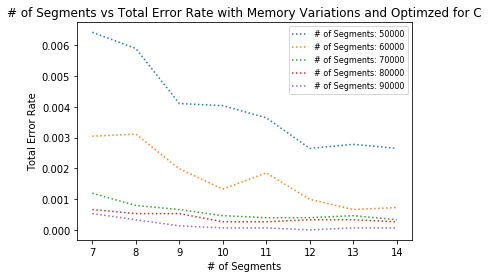

In [147]:
mem=np.arange(50000,100000,10000)
# fp=fp_calc(nn_model_bow_prob,bow_test['Label'],0.6)
# fn=fn_calc(nn_model_bow_prob,bow_test['Label'],0.6)
fig, ax = plt.subplots()
for i in range(len(total_error)):
    ax.plot(np.arange(7,15),total_error[i][0], linestyle='dotted', ms=15, label='# of Segments: '+str(mem[i]))
    #min_index=np.argmin(total_error[i])

# loc=(math.log(np.average(fp)/((1-np.average(fp))*((1/np.average(fn))-1)))/math.log(0.6185))
# ax.vlines(112*loc,ymin=0,ymax=0.008)
# ax.set_ylim([0,0.004])
# ax.plot(np.arange(1.0,0.1,-0.01),ideal_backup_err_array, linestyle='solid', ms=15, label='Back Up Filter Error Rate')
# ax.plot(np.arange(0.1,1.0,0.01),model_error_array, linestyle='dashdot', ms=15, label='Model Error Rate')
#ax.plot(np.arange(0,1.0,0.01),err_result_array, linestyle='dashdot', ms=15, label='Initial Filter Error Rate')
ax.set_xlabel('# of Segments')
ax.set_ylabel('Total Error Rate')
ax.legend(loc=1,fontsize=8)
# ax2=ax.twinx()
# for i in range(len(total_error)):
#     ax2.scatter(np.arange(7,15),total_error[i][1],marker='v',label='Optimzed C for {} Memory'.format(mem[i]))
# ax2.plot(np.arange(0.1,0.9,0.01),neg_count_array, linestyle='dashdot', ms=15, label='Predicted Negative Count')
# ax2.plot(np.arange(0.1,0.9,0.01),pos_truth_array, linestyle='solid', ms=15, label='Real Positive Count')
# ax2.plot(np.arange(0.1,0.9,0.01),neg_truth_array, linestyle='solid', ms=15, label='Real Negative Count')
# ax2.set_ylabel('Optimzed C Value')
# ax2.legend(loc=7,fontsize=8)
# ax.plot(np.arange(5000,20000,500),gradient, linestyle='dashdot', ms=15)
# plt.xlabel('# of Segments')
# plt.ylabel('Total Error Rate')
# plt.ylabel('Error Rate')
plt.title('# of Segments vs Total Error Rate with Memory Variations and Optimzed for C')
plt.savefig('result.pdf')
plt.show()

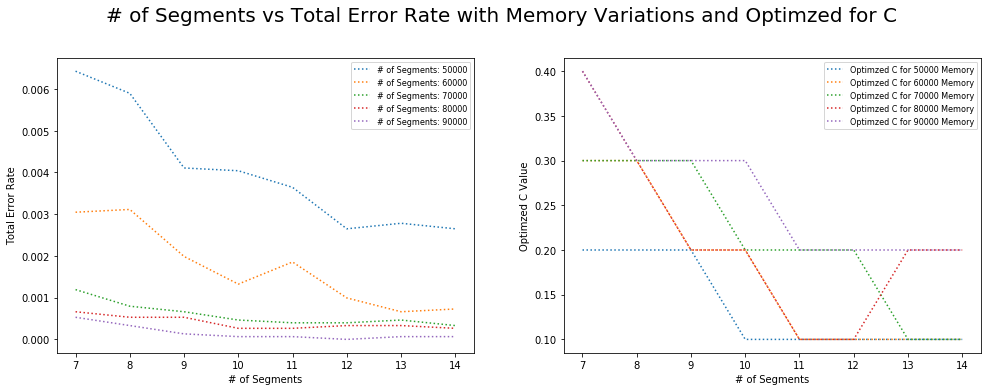

In [156]:
"""For Multi subplots"""
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,6))
fig.suptitle('# of Segments vs Total Error Rate with Memory Variations and Optimzed for C',size=20)
for i in range(len(total_error)):
    ax1.plot(np.arange(7,15),total_error[i][0], linestyle='dotted', ms=15, label='# of Segments: '+str(mem[i]))
#ax1.plot(np.arange(0.1,1.0,0.01),ideal_initial_err_array, linestyle='dashdot', ms=20, label='Ideal Initial BF False Positive Rate')
for i in range(len(total_error)):
    ax2.plot(np.arange(7,15),total_error[i][1],linestyle='dotted',label='Optimzed C for {} Memory'.format(mem[i]))
#ax2.plot(np.arange(0.1,1.0,0.01),ideal_backup_err_array, linestyle='dashdot', ms=20, label='Ideal Backup BF False Positive Rate')
#ax3.plot(np.arange(0.1,1.0,0.01),total_err_array, linestyle='solid', ms=20, label='Total False Positive Rate')
#ax3.plot(np.arange(0.1,1.0,0.01),ideal_total_err_array, linestyle='dashdot', ms=20, label='Ideal Total False Positive Rate')
fig.tight_layout(pad=6)
ax1.set_xlabel('# of Segments')
ax1.set_ylabel('Total Error Rate')
ax1.legend(fontsize=8)
ax2.set_xlabel('# of Segments')
ax2.set_ylabel('Optimzed C Value')
ax2.legend(fontsize=8)
# ax3.set_xlabel('% of Memory for Initial BF')
# ax3.set_ylabel('Error Rate')
#ax3.legend()
plt.savefig('result1.pdf')
plt.show()

# Import ALBF Module

In [37]:
from ALBF_copy2 import ALBF
albf=ALBF()
albf.construct(bow_input,'label','url',quantized_and_pruned_tflite_model,bow_test,20000,3000,0.3,12,sandwich=True)

/Users/yinzhema/Desktop/Thesis/Learned_Bloom_Filter/ALBF_copy2.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  round1_pos_df['Prob']=model_output


In [38]:
albf.search(bow_input['url'][0],np.array(bow_test.iloc[0,:]))

False

In [39]:
def f1():
    albf.search(bow_input['url'][0],np.array(bow_test.iloc[0,:]))
    
import timeit
if __name__ == "__main__": 
    print('Searching Time for ALBF: ',timeit.timeit(f1, number=1000))

Searching Time for ALBF:  1.674476827000035
